In [1]:
import sys
import os
#from source.utils import load_net, load_weights, dino_test_collate
import torch, torchvision
from utils import *
import matplotlib.pyplot as plt
import pandas as pd
from dataset import *
from torch.utils.data import Subset, random_split
import torchvision.transforms.v2 as transforms
from torch.utils.data import DataLoader
#from sklearn.decomposition import PCA
import seaborn as sb
from sklearn.manifold import TSNE
import umap
from backbone.backbone_main import load_backbone_

config = load_yaml("/homes/nmorelli/aibio_nico/config/head_conf.yaml")
device = load_device(config)
dataset = Rxrx1(root_dir=config["dataset_dir"], metadata_path=config["metadata_path"])

# net, loss_func, opt, sched = config_loader(config, dataset)
# if config["load_backbone"] is not None:
#     net = load_backbone_(net, config)

+--------------------+---------------------------------------------------------------------------+
|               Name |                                                                     Value |
+--------------------+---------------------------------------------------------------------------+
|                net |                                                                    simclr |
|      backbone_name |                                                                 vit_small |
|     checkpoint_dir |                                     /homes/nmorelli/aibio_nico/checkpoint |
|        dataset_dir |                                                   /work/ai4bio2024/rxrx1/ |
|    load_checkpoint |                                                                      None |
|      load_backbone |              /homes/nmorelli/aibio_nico/checkpoint/vit_base_pretrain_back |
|      metadata_path | /work/h2020deciderficarra_shared/rxrx1/metadata/m_3c_experiment_strat.csv |
|         

In [2]:
def plot_embeddings_cell_type(net: nn.Module, dataset: torch.utils.data.Subset):
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True,
                                            num_workers=8, drop_last=True, prefetch_factor=8, persistent_workers=True, pin_memory=True)

    embeddings = []
    labels = []
    net = net.to(device)
    net.eval()
    with torch.no_grad():
        for images, targets, meta in tqdm(dataloader):
            images = images.to(device)
            features = net.get_embedding(images)
            features = features.view(features.size(0), -1) 
            embeddings.append(features.cpu().numpy())
            # labels.extend(targets.numpy())
            labels.extend(torch.tensor(meta[dataset.dataset.cell_type_idx]).numpy())
            # labels.extend(torch.tensor(meta[dataset.dataset.experiment_idx]).numpy())

    embeddings = np.vstack(embeddings)
    labels = np.array(labels)
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap="jet", alpha=0.7)
    plt.colorbar(scatter, label="Class Labels")
    plt.title("t-SNE Visualization of Embeddings")
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.show()

def plot_embeddings_experiment(net: nn.Module, dataset: torch.utils.data.Subset):
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True,
                                            num_workers=8, drop_last=True, prefetch_factor=8, persistent_workers=True, pin_memory=True)

    embeddings = []
    labels = []
    net = net.to(device)
    net.eval()
    with torch.no_grad():
        for images, targets, meta in tqdm(dataloader):
            images = images.to(device)
            features = net.get_embedding(images)
            features = features.view(features.size(0), -1) 
            embeddings.append(features.cpu().numpy())
            # labels.extend(targets.numpy())
            # labels.extend(torch.tensor(meta[dataset.dataset.cell_type_idx]).numpy())
            labels.extend(torch.tensor(meta[dataset.dataset.experiment_idx]).numpy())

    embeddings = np.vstack(embeddings)
    labels = np.array(labels)
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap="jet", alpha=0.7)
    plt.colorbar(scatter, label="Class Labels")
    plt.title("t-SNE Visualization of Embeddings")
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.show()

In [3]:
_, test_split = random_split(dataset, [0.95, 0.05])
len(test_split)

6275

  0%|          | 0/196 [00:00<?, ?it/s]/tmp/ipykernel_2206244/3714222797.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels.extend(torch.tensor(meta[dataset.dataset.cell_type_idx]).numpy())
100%|██████████| 196/196 [00:12<00:00, 15.08it/s]


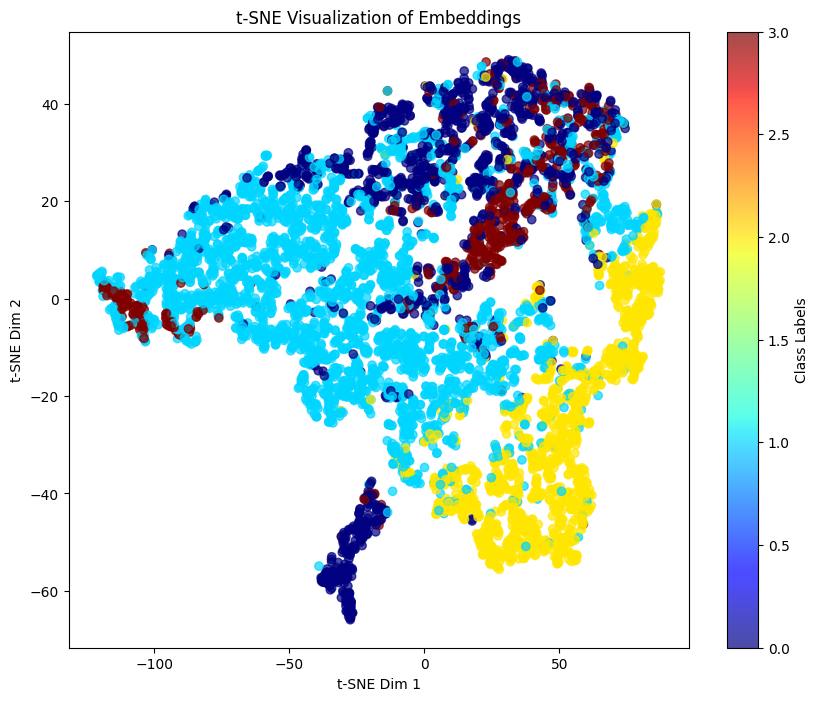

In [4]:
checkpoint = torch.load("/homes/nmorelli/aibio_nico/checkpoint/vit_small_back")
net, loss_func, opt, sched = config_loader(config, dataset)
# net2 = nn.DataParallel(net2)
net.load_state_dict(checkpoint["model_state_dict"], strict=False)
net.eval()
plot_embeddings_cell_type(net, test_split)


  0%|          | 0/196 [00:00<?, ?it/s]/tmp/ipykernel_2206244/3714222797.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels.extend(torch.tensor(meta[dataset.dataset.experiment_idx]).numpy())
100%|██████████| 196/196 [00:11<00:00, 17.16it/s]


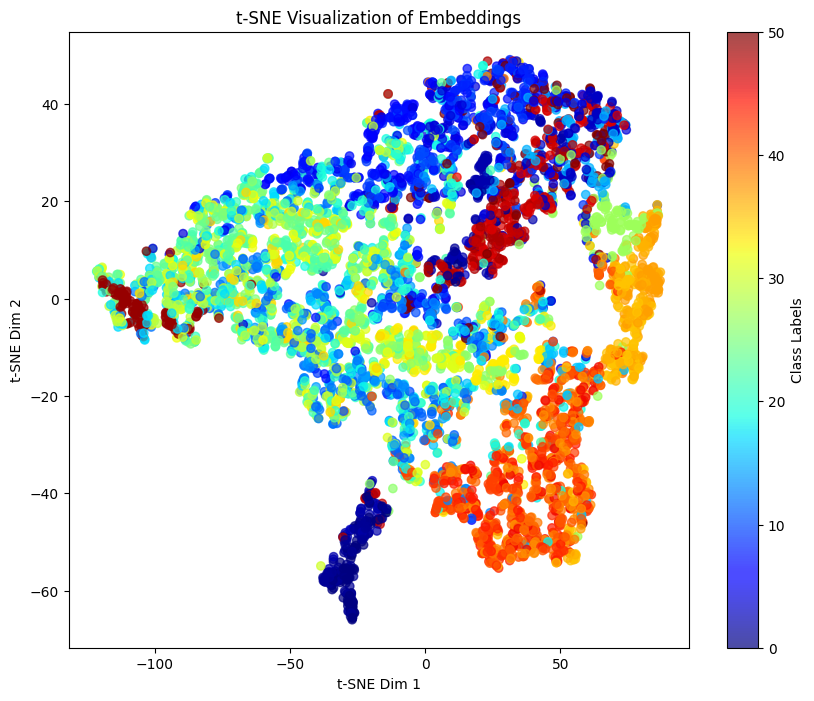

In [5]:
plot_embeddings_experiment(net, test_split)
